# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name=r'C:\Users\Lucas-PC\Downloads\Reacher_Windows_x86_64\Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [60]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.3199999928474426


When finished, you can close the environment.

In [61]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### Network Layer

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

def weights_init_lim(layer):
    # similar to Xavier initialization except it's
    input_dim = layer.weight.data.size()[0] #dimension of the input layer
    lim = 1./np.sqrt(input_dim)
    return (-lim, lim)

class PPO_Actor(nn.Module):
    """
        Actor: input state (array), convert into action. Based on that
               action create a prob distribution. Based on that distribution
               resample another action. Output the resampled action and prob dist.
               Lastly an entropy term is created for exploration.
    """

    def __init__(self, state_size, action_size, device,
                 hidden_layer1, hidden_layer2, hidden_layer3, seed=0):
        """Initialize parameters and build model.
        Key Params
        ======
        inputs:
            state_size (int): Dimension of input state
            action_size (int): Dimension of out action size
            seed (int): Random seed
            hidden_layer1(int): number of neurons in first hidden layer
            hidden_layer2(int): number of neurons in second hidden layer
            hidden_layer3(int): number of neurons in second hidden layer
        outputs:
            probability distribution (float) range 0:+1 of sampled action
            action as recommended by the network range -1:+1
            sampled action range -1:+1
            entropy for noise
        """
        super(PPO_Actor, self).__init__()
        self.seed = torch.manual_seed(seed)

        # input size: batch_size or num_agents x state_size
        self.bn_1a = nn.BatchNorm1d(state_size)
        self.fc_1a = nn.Linear(state_size, hidden_layer1)

        self.bn_2a = nn.BatchNorm1d(hidden_layer1)
        self.fc_2a = nn.Linear(hidden_layer1, hidden_layer2)

        self.bn_3a = nn.BatchNorm1d(hidden_layer2)
        self.fc_3a = nn.Linear(hidden_layer2, hidden_layer3)

        self.bn_4a = nn.BatchNorm1d(hidden_layer3)
        self.fc_4a = nn.Linear(hidden_layer3, action_size)

        # std of the distribution for the resampled action
        self.std = nn.Parameter(torch.ones(1, action_size)*0.15)

        self.PReLU = nn.PReLU() # leaky relu

        self.to(device)

        self.reset_parameters()

    def reset_parameters(self):
        # initialize the values
        self.fc_1a.weight.data.uniform_(*weights_init_lim(self.fc_1a))
        self.fc_2a.weight.data.uniform_(*weights_init_lim(self.fc_2a))
        self.fc_3a.weight.data.uniform_(*weights_init_lim(self.fc_3a))
        self.fc_4a.weight.data.uniform_(-1e-3,1e-3)

    def forward(self, s, resampled_action=None, std_scale=1.0):
        """Build a network that maps state -> actions."""
        # state, apply batch norm BEFORE activation
        s = self.PReLU(self.fc_1a(self.bn_1a(s))) #linear -> batchnorm -> activation
        s = self.PReLU(self.fc_2a(self.bn_2a(s)))
        s = self.PReLU(self.fc_3a(self.bn_3a(s)))
        action_mean = torch.tanh(self.fc_4a(self.bn_4a(s))) #-> action/critic streams

        # action_mean: proposed action, we will then use this action as
        # mean to generate a prob distribution to output log_prob
        # base on the action as mean create a distribution with zero std...
        # dist = torch.distributions.Normal(a_mean, F.softplus(self.std))
        dist = torch.distributions.Normal(action_mean, F.hardtanh(self.std,
                                                                  min_val=0.05*std_scale,
                                                                  max_val=0.5*std_scale))
        # sample from the prob distribution just generated again
        if resampled_action is None:
            resampled_action = dist.sample() #num_agent/batch_size x action_size

        # then we have log( p(resampled_action | state) ): batchsize, 1
        log_prob = dist.log_prob(resampled_action).sum(-1).unsqueeze(-1)
        entropy = dist.entropy().mean() #entropy for noise
        # final output
        return log_prob, action_mean, resampled_action, entropy


class PPO_Critic(nn.Module):
    """
        PPO Critic Network.
        Critic: input a state and output a Q value (action is implicit)
                The Q value is used to calculate advantage score and td value.
    """

    def __init__(self, state_size, action_size, device,
                 hidden_layer1, hidden_layer2, hidden_layer3, seed=0):
        """Initialize parameters and build model.
        Key Params
        ======
        inputs:
            input_channel (int): Dimension of input state
            action_size (int): Dimension of each action
            seed (int): Random seed
            hidden_layer1(int): number of neurons in first hidden layer
            hidden_layer2(int): number of neurons in second hidden layer
            hidden_layer3(int): number of neurons in second hidden layer
        outputs:
            V or Q value estimation (float) real number
        """

        super(PPO_Critic, self).__init__()
        self.seed = torch.manual_seed(seed)

        ################# STATE INPUTS ##################
        # input size: batch_size or m x state_size
        self.bn_1s = nn.BatchNorm1d(state_size)
        self.fc_1s = nn.Linear(state_size, hidden_layer1)

        ########### ACTION INPUTS / MERGE LAYERS #########
        # input size: batch_size or num_agents x action sizes
        #self.fc_1m = nn.Linear(hidden_layer1+action_size, hidden_layer2)
        self.bn_2s = nn.BatchNorm1d(hidden_layer1)
        self.fc_2s = nn.Linear(hidden_layer1, hidden_layer2)

        self.bn_3s = nn.BatchNorm1d(hidden_layer2)
        self.fc_3s = nn.Linear(hidden_layer2, hidden_layer3)

        self.bn_4s = nn.BatchNorm1d(hidden_layer3)
        self.fc_4s = nn.Linear(hidden_layer3, 1)

        self.PReLU = nn.PReLU() # leaky relu

        self.to(device)

        self.reset_parameters()

    def reset_parameters(self):
        # initialize the values
        self.fc_1s.weight.data.uniform_(*weights_init_lim(self.fc_1s))
        self.fc_2s.weight.data.uniform_(*weights_init_lim(self.fc_2s))
        self.fc_3s.weight.data.uniform_(*weights_init_lim(self.fc_3s))
        self.fc_4s.weight.data.uniform_(-1e-3,1e-3)

    def forward(self, s, a):
        """Build a network that maps state -> actions."""
        # state, apply batch norm BEFORE activation
        # state network
        s = self.PReLU(self.fc_1s(self.bn_1s(s)))

        s = self.PReLU(self.fc_2s(self.bn_2s(s)))

        s = self.PReLU(self.fc_3s(self.bn_3s(s)))

        # Q value
        v = self.PReLU(self.fc_4s(self.bn_4s(s)))

        # final output
        return v

class PPO_ActorCritic(nn.Module):

    def __init__(self, state_size, action_size, device, seed=0):

        super(PPO_ActorCritic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.actor = PPO_Actor(state_size, action_size, device, 1024, 1024, 512, seed=seed)
        self.critic = PPO_Critic(state_size, action_size, device, 1024, 1024, 512, seed=seed)


    def forward(self, s, action=None, std_scale=1.0):
        log_prob, action_mean, resampled_action, entropy = self.actor(s, action,
                                                                      std_scale)
        if action is None: action = resampled_action
        v = self.critic(s, action)

        pred = {'log_prob': log_prob, # prob dist based on actions generated, grad true,  (num_agents, 1)
                'a': resampled_action, #sampled action based on prob dist torch (num_agents,action_size)
                'a_mean': action_mean, #original action as recommended by the network
                'ent': entropy, #for noise, grad true, (num_agents or m, 1)
                'v': v #Q score, state's V value, grad true (num_agents or m,1)
                }
        # final output
        return pred

In [10]:
import numpy as np
import random
import torch
import torch.optim as optim
import torch.nn.functional as F
import torch.nn.utils as U
from collections import namedtuple, deque


##### CONFIG PARMAS #####
BATCH_SIZE = 1024             # batch size of sampling
MIN_BATCH_NO = 32             # min no of batches needed in the memory before learning
GAMMA = 0.95                  # discount factor
T_MAX = 512                   # max number of time step for collecting trajectory
T_MAX_EPS = int(3e4)          # max number of steps before break
LR = 1e-4                     # learning rate #5e-4
OPTIM_EPSILON = 1e-5          # EPS for Adam optimizer
OPTIM_WGT_DECAY =  1e-4       # Weight Decay for Adam optimizer
GRAD_CLIP_MAX = 1.0           # max gradient allowed
CRITIC_L_WEIGHT = 1.0         # mean square error term weight
ENT_WEIGHT = 0.01             # weight of entropy added
ENT_DECAY = 0.995             # decay of entropy per 'step'
STD_SCALE_INIT = 1.0          # initial value of std scale for action resampling
STD_SCALE_DECAY = 0.995       # scale decay of std
P_RATIO_EPS = 0.1             # eps for ratio clip 1+eps, 1-eps
EPS_DECAY = 0.995             # decay factor for eps for ppo clip
NAN_PENALTY = -5.0            # penalty for actions that resulted in nan reward
USE_GAE = True                # use GAE flag
GAE_TAU = 0.99                # value control how much agent rely on current estimate

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class PPO_Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, env, state_size, action_size, num_agents=20, seed=0):
        """Initialize an Agent object.
        Params
        ======
            env (env object): object of the env
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            num_agents (int): number of agents run in parallel
            seed (int): random seed
        """
        self.env = env
        self.brain_name = self.env.brain_names[0]
        self.state_size = state_size
        self.action_size = action_size
        self.num_agents = num_agents
        self.seed = random.seed(seed)
        self.gamma = GAMMA # discount rate
        self.t_max = T_MAX # max number of steps for episodic exploration

        # Replay memory
        self.memory = ReplayBuffer(BATCH_SIZE, num_agents, seed)

        # Init Network Models and Optimizers
        self.model_local = PPO_ActorCritic(state_size, action_size, device, seed).to(device)
        self.optim = optim.Adam(self.model_local.parameters(), lr=LR,
                                eps=OPTIM_EPSILON, weight_decay=OPTIM_WGT_DECAY)

        # Initialize time step (for updating every UPDATE_EVERY steps and others)
        self.t_step = 1

        # entropy
        self.ent_weight = ENT_WEIGHT
        # eps for clipping
        self.p_ration_eps = P_RATIO_EPS
        # std for noise
        self.std_scale = STD_SCALE_INIT

        # for tracking
        self.total_steps = deque(maxlen=100)
        self.episodic_rewards = deque(maxlen=1000) # hist of rewards total of DONE episodes
        self.running_rewards = np.zeros(self.num_agents)

        self.critic_loss_hist = deque(maxlen=100)
        self.actor_gain_hist = deque(maxlen=100)

        # training or just accumulating experience?
        self.is_training = False

        print("current device: ", device)


    def _toTorch(self, s, dtype=torch.float32):
        return torch.tensor(s, dtype=dtype, device=device)

    def act(self, state):
        """Returns deterministic actions for given state using the
           Actor policy Network.
        Params
        ======
            state (array_like): current state, # agents x state_space
            action_values (array like, -1:+1) no grad
        """
        with torch.no_grad():
            _prob, _a_mean, action, _ent = self.model_local.actor(self._toTorch(state),
                                                                  std_scale=0.0)

        return np.clip(action.detach().cpu().numpy(), -1 , 1)


    def _collect_trajectory_data(self, train_mode=True, is_collecting=True):
        """
        Collect trajectory data and store them
        output: tuple of list (len: len(states)) of:
                states, log_probs, actions, rewards, As, rts
        """

        # reset env and running reward
        env_info = self.env.reset(train_mode=train_mode)[self.brain_name] # reset env
        self.running_rewards = np.zeros(self.num_agents)

        s, p, a, r, ns, d, A, V, rt = ([] for l in range(9)) #initialization

        # initial state
        state = self._toTorch(env_info.vector_observations) # tensor: num_agents x state_size

        # Collect the STEP trajectory data (s,a,r,ns,d)
        ep_len = 0
        while True:
            # state -> prob / actions
            state_predict = self.model_local(state, std_scale=self.std_scale)

            action = state_predict['a'] #torch, num_agents x action_size no grad
            action = np.clip(action.cpu().detach().numpy(), -1., 1.)
            if np.any(np.isnan(action)):
                print("nan action encountered!")
                return

            env_info = self.env.step(action)[self.brain_name]

            next_state = self._toTorch(env_info.vector_observations)
            reward = np.array(env_info.rewards) # array: (num_agents,)
            done = np.array(env_info.local_done) #array: (num_agents,) boolean

            # recognize the current reward first
            if not np.any(np.isnan(reward)):
                self.running_rewards += reward
            else:
                self.running_rewards += NAN_PENALTY
                print("nan reward encountered!")
            if is_collecting:
                s.append(state) #TENSOR: num_agents x state_size (129)
                p.append(state_predict['log_prob'].detach()) #tensor: (num_agents x 1), NO grad
                a.append(state_predict['a']) #tensor: num_agents x action_size
                r.append(np.array(reward).reshape(-1,1)) #array: num_agents x 1
                ns.append(next_state) #TENSOR: num_agents x state_size (129)
                d.append(1.*np.array(done).reshape(-1,1)) #array: num_agents x 1， 1. 0.
                V.append(state_predict['v'].cpu().detach().numpy()) #Q value TENSOR:
                                                              #num_agents x 1, require grad
            state = next_state

            if ep_len >= T_MAX:
                if is_collecting:
                    is_collecting = False
                    last_state = next_state

                if np.all(done) or ep_len>=T_MAX_EPS: #only if t_max is reached and np.all done.
                    agents_mean_eps_reward = np.nanmean(self.running_rewards+1e-10)
                    if not np.isnan(agents_mean_eps_reward):
                        self.episodic_rewards.append(agents_mean_eps_reward) #avoid nan
                    self.total_steps.append(ep_len)
                    break

            ep_len += 1

        assert(len(s) == T_MAX+1)

        # Compute the Advantage/Return value
        # note that last state has no entry in record in V
        last_state_predict = self.model_local(last_state)

        # use td target as return, td error as advantage
        V.append(last_state_predict['v'])

        advantage = np.zeros([self.num_agents, 1])
        returns = last_state_predict['v'].cpu().detach().numpy()
        for i in reversed(range(T_MAX)):
            # effect of this loop is similar future credit assignments
            returns = r[i] + GAMMA * (1-d[i]) * returns
            #td_current = V[i].detach().numpy()
            if not USE_GAE:
                advantage = returns - V[i]
            else:
                td_error = r[i] + GAMMA * (1-d[i]) * V[i+1] - V[i]
                advantage = advantage * GAE_TAU * GAMMA * (1-d[i]) + td_error
            A.append(advantage) #array:, num_agents x 1, no grad
            rt.append(returns) #array:, num_agents x 1, no grad

        # reverse the list order
        A = A[::-1]
        rt = rt[::-1]

        # store data in memory
        self.memory.add((s, p, a, r, A, rt)) #tuple of list by types of data


    def step(self, train_mode=True):
        """ a step of collecting, sampling data and learn from it
            eps: for exploration if external noise is added
            train_mode: for the env
        """

        self._collect_trajectory_data(train_mode=train_mode)

        if train_mode and len(self.memory) >= BATCH_SIZE * MIN_BATCH_NO:
            if self.is_training == False:
                print("Prefetch completed. Training starts! \r")
                print("Number of Agents: ", self.num_agents)
                print("Device: ", device)
                self.is_training = True

            randomized_batches = self.memory.retrieve_memory() #sample from memory
            self.learn(randomized_batches) #learn from it and update grad

            # entropy weight decay
            self.ent_weight *= ENT_DECAY
            # std decay
            self.std_scale *= STD_SCALE_DECAY
            # eps decay
            self.p_ration_eps *= EPS_DECAY

            self.memory.reset()

        self.t_step += 1

    def learn(self, randomized_batches):
        """Update the parameters of the policy based on the data in the sampled
           trajectory.
        Params
        ======
        inputs:
            m_batch: (tuple) of:
                batch of states: (tensor) batch_size or num_agents x state_size
                batch of old_probs: (tensor) batch_size or num_agents x 1
                batch of actions: (tensor) batch_size or num_agents x state_size
                batch of rewards: (tensor) batch_size or num_agents x 1
                batch of Advantages: (tensor) batch_size or num_agents x 1
                batch of Returns/TDs: (tensor) batch_size or num_agents x 1
        """
        for (s, old_prob, old_actions, r, Advantage, returns_) in randomized_batches:
            #s, p, a, r, Advantage, td_target = m_batch

            ############################# ACTOR LOSS ##############################
            s_predictions = self.model_local(s, old_actions, self.std_scale) #use old s, a to get new prob
            new_prob = s_predictions['log_prob'] # num_agents x 1
            assert(new_prob.requires_grad == True)
            assert(Advantage.requires_grad == False)

            ratio = (new_prob - old_prob).exp() # # num_agent or m x 1

            G = ratio * Advantage

            G_clipped = torch.clamp(ratio, min=1.-P_RATIO_EPS,
                                           max=1.+P_RATIO_EPS) * Advantage

            G_loss = torch.min(G, G_clipped).mean(0)

            actor_loss = -(G_loss + self.ent_weight * s_predictions['ent'].mean())

            ############################ CRITIC LOSS ##############################
            assert(s_predictions['v'].requires_grad == True) #num_agent or m x 1, requires grad

            critic_loss = 0.5 * (returns_ - s_predictions['v']).pow(2).mean()

            # TOTAL LOSS
            total_loss = actor_loss + CRITIC_L_WEIGHT * critic_loss

            self.optim.zero_grad()
            total_loss.backward() #retain_graph=True
            U.clip_grad_norm_(self.model_local.parameters(), GRAD_CLIP_MAX)
            self.optim.step()

            self.actor_gain_hist.append(-actor_loss.data.cpu().detach().numpy())
            self.critic_loss_hist.append(critic_loss.data.cpu().detach().numpy())


class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, batch_size, num_agents, seed=0):
        """Data Structure to store experience object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.memory = []
        self.batch_size = batch_size
        self.num_agents = num_agents

        # data structure for storing individual experience
        self.data = namedtuple("data", field_names=["states", "old_probs",
                                                    "actions", "rewards",
                                                    "As", "returns"])
        torch.manual_seed(seed)


    def add(self, single_traj_data):
        """ Add a new experience to memory.
            data: (tuple) states, log_probs, rewards, As, Vs
        """
        (s_, p_, a_, r_, A_, rt_) = single_traj_data #equal lengths

        for s, p, a, r, A, rt in zip(s_, p_, a_, r_, A_, rt_): #by time step
            i = 0
            while i < self.num_agents: #by agent
                e = self.data(s[i,:], p[i,:].detach(), a[i,:], r[i], A[i], rt[i])
                self.memory.append(e)
                i += 1

    def retrieve_memory(self):
        """Retrieve all data in memory in randomized order."""
        # convert memory structure into giant listS by data type
        (all_s, all_p, all_a, all_r, all_A, all_rt) = list(zip(*self.memory))
        assert(len(all_s) == len(self.memory))

        # so that we can normalized Advantage before sampling
        all_A = tuple((all_A - np.nanmean(all_A))/np.std(all_A))

        indices = np.arange(len(self.memory))
        np.random.shuffle(indices)
        indices = [indices[div*self.batch_size: (div+1)*self.batch_size]
                   for div in range(len(indices) // self.batch_size + 1)]

        result = []
        for batch_no, sample_ind in enumerate(indices):
            if len(sample_ind) >= self.batch_size / 2:
                s_s, s_p, s_a, s_r, s_A, s_rt = ([] for l in range(6))

                i = 0
                while i < len(sample_ind): #while loop is faster
                    s_s.append(all_s[sample_ind[i]]) #@each torch, state_size
                    s_p.append(all_p[sample_ind[i]]) #@each torch, 1
                    s_a.append(all_a[sample_ind[i]]) #@each array, (action_size,)
                    s_r.append(all_r[sample_ind[i]]) #@each array, 1
                    s_A.append(all_A[sample_ind[i]]) #@each array, 1
                    s_rt.append(all_rt[sample_ind[i]]) #@each array, 1
                    i += 1

                # change the format to tensor and make sure dims are correct for calculation
                s_s = torch.stack(s_s).float().to(device)
                s_p = torch.stack(s_p).float().to(device)
                s_a = torch.stack(s_a).float().to(device)
                s_r = torch.from_numpy(np.vstack(s_r)).float().to(device)
                s_A = torch.from_numpy(np.stack(s_A)).float().to(device)
                s_rt = torch.from_numpy(np.stack(s_rt)).float().to(device)

                result.append((s_s, s_p, s_a, s_r, s_A, s_rt))

        return result


    def reset(self):
        self.memory = []

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [11]:
def saveTrainedModel(agent, path):
    state_dicts = {'actor_model': agent.model_local.actor.state_dict(),
                   'critic_model': agent.model_local.critic.state_dict()}
    torch.save(state_dicts, path)
    
def loadTrainedModel(agent, path):
    state_dicts = torch.load(path,map_location={'cuda:0': 'cpu'})

    agent.model_local.actor.load_state_dict(state_dicts['actor_model'])
    agent.model_local.critic.load_state_dict(state_dicts['critic_model'])
    
    return agent


In [12]:

#import PPO_util 

model_dir = 'C:/Users/Lucas-PC/deep-reinforcement-learning/p2_continuous-control/'
model_name = 'unity_continuous_' + str(brain_name) + '_' + str(num_agents) + '_maxscore6' + '_agents.pt'

agent = PPO_Agent(env, state_size, action_size, num_agents=num_agents, seed=0)


current device:  cuda:0


In [13]:
episode_max = 1000 # training loop max iterations
episode_reward = 0.0
mean_rewards = []
max_score = -np.inf
e = 0
goal_reached = False

while e < episode_max:

    # collect trajectories
    agent.step()
    episode_reward = agent.episodic_rewards

    # display some progress every 20 iterations
    if agent.is_training:

        # get the average reward of the parallel environments
        mean_rewards.append(np.mean(episode_reward))        
        
        if (e+5)%1==0 :
            print("e: {}  score: {:.2f}  Avg score(100e): {:.2f}  "
                  "A(g): {:.2f}  C(l): {:.2f}  std: {:.2f}  steps: {}".format(e+1, np.mean(episode_reward),
                                                                              np.mean(mean_rewards[-100:]),
                                                                              np.mean(agent.actor_gain_hist), 
                                                                              np.mean(agent.critic_loss_hist),
                                                                              agent.std_scale, 
                                                                              int(np.mean(agent.total_steps))))
        if np.mean(mean_rewards[-100:]) > max_score:
            max_score = np.mean(mean_rewards[-100:])
            saveTrainedModel(agent, model_dir + model_name)
            
        if np.mean(episode_reward) >= 30 and not goal_reached :
            goal_reached = True
            episode_max = e + 5
            print("Score reached benchmark of 2000. Problem Solved!")
        
        e += 1
    else:
        print('\rFetching experiences... {} '.format(len(agent.memory.memory)), end="")

Fetching experiences... 30720 Prefetch completed. Training starts! 
Number of Agents:  20
Device:  cuda:0
e: 1  score: 0.03  Avg score(100e): 0.03  A(g): -0.01  C(l): 0.00  std: 0.99  steps: 1000
e: 2  score: 0.03  Avg score(100e): 0.03  A(g): -0.01  C(l): 0.00  std: 0.99  steps: 1000
e: 3  score: 0.03  Avg score(100e): 0.03  A(g): -0.01  C(l): 0.00  std: 0.99  steps: 1000
e: 4  score: 0.03  Avg score(100e): 0.03  A(g): -0.01  C(l): 0.00  std: 0.99  steps: 1000
e: 5  score: 0.03  Avg score(100e): 0.03  A(g): -0.01  C(l): 0.00  std: 0.99  steps: 1000
e: 6  score: 0.03  Avg score(100e): 0.03  A(g): -0.01  C(l): 0.00  std: 0.99  steps: 1000
e: 7  score: 0.03  Avg score(100e): 0.03  A(g): -0.01  C(l): 0.00  std: 0.99  steps: 1000
e: 8  score: 0.03  Avg score(100e): 0.03  A(g): -0.01  C(l): 0.00  std: 0.99  steps: 1000
e: 9  score: 0.03  Avg score(100e): 0.03  A(g): -0.01  C(l): 0.00  std: 0.99  steps: 1000
e: 10  score: 0.03  Avg score(100e): 0.03  A(g): -0.01  C(l): 0.00  std: 0.99  steps

In [14]:
env.close()

# DDPG

In [5]:
from collections import deque
import matplotlib.pyplot as plt
from agent import Agent
import torch

%matplotlib inline

Episode 1	Score: 0.56	Average Score: 0.56.10
Episode 2	Score: 1.51	Average Score: 1.04.73
Episode 3	Score: 2.23	Average Score: 1.43.67
Episode 4	Score: 4.24	Average Score: 2.14.18
Episode 5	Score: 6.53	Average Score: 3.01.78
Episode 6	Score: 8.62	Average Score: 3.951.29
Episode 7	Score: 11.20	Average Score: 4.984.02
Episode 8	Score: 12.60	Average Score: 5.948.30
Episode 9	Score: 15.34	Average Score: 6.9822.82
Episode 10	Score: 21.16	Average Score: 8.403.61
Episode 11	Score: 23.47	Average Score: 9.777.29
Episode 12	Score: 25.68	Average Score: 11.09.17
Episode 13	Score: 29.05	Average Score: 12.48.84
Episode 14	Score: 30.78	Average Score: 13.78.93
Episode 15	Score: 34.56	Average Score: 15.17.00
Episode 16	Score: 36.58	Average Score: 16.51.33
Episode 17	Score: 37.49	Average Score: 17.74.39
Episode 18	Score: 38.41	Average Score: 18.89.38
Episode 19	Score: 38.73	Average Score: 19.93.49
Episode 20	Score: 38.66	Average Score: 20.87.45
Episode 21	Score: 39.03	Average Score: 21.73.47
Episode 22	

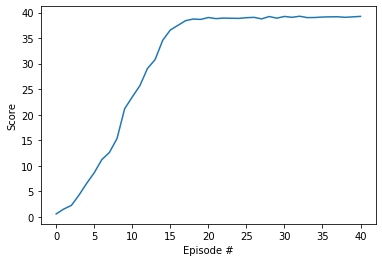

In [6]:

def ddpg(n_episodes=300, max_t=1000):
    """ Deep Deterministic Policy Gradients
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores_window = deque(maxlen=100)
    scores = np.zeros(num_agents)
    scores_episode = []
    
    agents =[] 
    
    for i in range(num_agents):
        agents.append(Agent(state_size, action_size, random_seed=0))
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        for agent in agents:
            agent.reset()
            
        scores = np.zeros(num_agents)
            
        for t in range(max_t):
            #actions = [agents[i].act(states[i]) for i in range(num_agents)]
            actions = np.array([agents[i].act(states[i]) for i in range(num_agents)])
#             if t == 0:
#                 print("actions", actions)
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations     # get the next state
            rewards = env_info.rewards                     # get the reward
            dones = env_info.local_done        
            
            for i in range(num_agents):
                agents[i].step(t,states[i], actions[i], rewards[i], next_states[i], dones[i]) 
 
            states = next_states
            scores += rewards
            if t % 20:
                print('\rTimestep {}\tScore: {:.2f}\tmin: {:.2f}\tmax: {:.2f}'
                      .format(t, np.mean(scores), np.min(scores), np.max(scores)), end="") 
            if np.any(dones):
                break 
        score = np.mean(scores)
        scores_window.append(score)       # save most recent score
        scores_episode.append(score)

        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_window)), end="\n")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(Agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(Agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores_episode

scores = ddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()